Obtención del dataset:
https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign



Preparación de los datos

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from kneed import KneeLocator


import plotly.graph_objs as go
from collections import Counter
import glob
import statistics

# ignorar warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Leer database


data = pd.read_csv("marketing_campaign.csv", sep=";")


FileNotFoundError: [Errno 2] No such file or directory: 'marketing_campaign.csv'

Contenido de las variables del database:

1. **ID**=Customer's unique identifier
1. **Year_Birth**=Customer's birth year
1. **Education**=Customer's education level
1. **Marital_Status**=Customer's marital status
1. **Income**=Customer's yearly household income
1. **Kidhome**=Number of children in customer's household
1. **Teenhome**=Number of teenagers in customer's household
1. **Dt_Customer**=Date of customer's enrollment with the company
1. **Recency**=Number of days since customer's last purchase
1. **MntWines**=Amount spent on wine in the last 2 years
1. **MntFruits**=Amount spent on fruits in the last 2 years
1. **MntMeatProducts**=Amount spent on meat in the last 2 years
1. **MntFishProducts**=Amount spent on fish in the last 2 years
1. **MntSweetProducts**=Amount spent on sweets in the last 2 years
1. **MntGoldProds**=Amount spent on gold in the last 2 years
1. **NumDealsPurchases**=Number of purchases made with a discount
1. **NumWebPurchases**=Number of purchases made through the company's web site
1. **NumCatalogPurchases**=Number of purchases made using a catalogue
1. **NumStorePurchases**=Number of purchases made directly in stores
1. **NumWebVisitsMonth**=Number of visits to company's web site in the last month
1. **AcceptedCmp3**=1 if customer accepted the offer in the 3rd campaign, 0 otherwise
1. **AcceptedCmp4**=1 if customer accepted the offer in the 4th campaign, 0 otherwise
1. **AcceptedCmp5**=1 if customer accepted the offer in the 5th campaign, 0 otherwise
1. **AcceptedCmp1**=1 if customer accepted the offer in the 1st campaign, 0 otherwise
1. **AcceptedCmp2**=1 if customer accepted the offer in the 2nd campaign, 0 otherwise
1. **Response**=1 if customer accepted the offer in the last campaign, 0 otherwise
1. **Complain**=1 if customer complained in the last 2 years, 0 otherwise
1. **Country**=Customer's location

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
# Renombrar las columnas


data.rename(columns = {'Year_Birth': 'YearBirth',
                       'Marital_Status': 'MaritalStatus', 
                       'Dt_Customer': 'DtCustomer', 
                       'Z_CostContact': 'ZCostContact',
                       'Z_Revenue': 'ZRevenue', 
                       'Kidhome': 'KidHome',
                       'Teenhome': 'TeenHome'}, inplace = True)





data.head()

,ID,YearBirth,Education,MaritalStatus,Income,KidHome,TeenHome,DtCustomer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,ZCostContact,ZRevenue,Response
0,5524,1957,Graduation,Single,58138.00,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.00,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.00,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.00,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.00,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
data["MaritalStatus"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [ ]:
# Reemplazar valores equivalentes:


data["MaritalStatus"]=data["MaritalStatus"].replace({"YOLO":"Single", "Absurd":"Single", "Alone":"Single"})



In [ ]:
data["MaritalStatus"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow'], dtype=object)

In [ ]:
# chequeando los datos nulos.
data.isnull().sum()

ID                      0
YearBirth               0
Education               0
MaritalStatus           0
Income                 24
KidHome                 0
TeenHome                0
DtCustomer              0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
ZCostContact            0
ZRevenue                0
Response                0
dtype: int64

In [ ]:
# Los valores nulos estan en la colunma de los ingresos ('Income')
# se rellenaran con el cálculo de la media de los ingresos de cada nivel de estudios.


# Llenamos los valores que faltan al database de acuerdo con la media de los ingresos según la columna de 'Education'
unique_Education = pd.unique(data.Education)

# Encontrar el valor medio de los ingresos según el nivel académico.
# Equalize the average Income values to the missing values in Income specific to Education
temp_data = data.copy()  # set temp_data variable to avoid losing real data
columns = ['Income'] # it can be add more column
for c in unique_Education:
    
    # creamos un filtro según 'Education'
    Education_filtre = temp_data.Education == c
    # filter data by Education
    filtered_data = temp_data[Education_filtre]
    
    # find average for Income in specific to Education
    for s in columns:
        mean = np.round(np.mean(filtered_data[s]), 2)
        if ~np.isnan(mean): # if there if average specific to Education
            filtered_data[s] = filtered_data[s].fillna(mean)
            print(f"Los valores que faltan en {s} columna rellenarlos con {mean} cuando Education:{c}")
        else: # find average for all data if no average in specific to Education
            all_data_mean = np.round(np.mean(data[s]), 2)
            filtered_data[s] = filtered_data[s].fillna(all_data_mean)
            print(f"Los valores que faltan en {s} columna rellenarlos con {all_data_mean}")
    # Synchronize data filled with missing values in Income to data temporary            
    temp_data[Education_filtre] = filtered_data

# equate the deprecated temporary data to the real data variable
data = temp_data.copy() 

Los valores que faltan en Income columna rellenarlos con 52720.37 cuando Education:Graduation
Los valores que faltan en Income columna rellenarlos con 56145.31 cuando Education:PhD
Los valores que faltan en Income columna rellenarlos con 52917.53 cuando Education:Master
Los valores que faltan en Income columna rellenarlos con 20306.26 cuando Education:Basic
Los valores que faltan en Income columna rellenarlos con 47633.19 cuando Education:2n Cycle


In [ ]:
# Volvemos a chequear los datos nulos.
data.isnull().sum()

ID                     0
YearBirth              0
Education              0
MaritalStatus          0
Income                 0
KidHome                0
TeenHome               0
DtCustomer             0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
ZCostContact           0
ZRevenue               0
Response               0
dtype: int64

In [ ]:
# Checkea que no hay datos duplicados
data.duplicated().sum()

0

In [ ]:
# creando las columnas Year, Month, Age para clasificar por edad.
from datetime import datetime as dt

dataset = data
# convert the 'Date' column to datetime format
data['DtCustomer']= pd.to_datetime(data['DtCustomer'])

# create Year, Month, Day columns
data['Year'] = data["DtCustomer"].dt.year
data['Month'] = data["DtCustomer"].dt.month

#create Age column 
age = []
for i in data["YearBirth"]:
    if i <= 1959:
        age.append("Elderly")
    elif i > 1959 and i <=1977:
        age.append("MiddleAge")
    else:
        age.append("Young")
data["Age"] = age

# Borrar columnas originales innecesarias para nuestro análisis.
data.drop(['DtCustomer', 'ID', 'ZCostContact', 'ZRevenue'], axis=1, inplace=True)

## Analisis y visualización de los datos

In [ ]:
# information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YearBirth            2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   MaritalStatus        2240 non-null   object 
 3   Income               2240 non-null   float64
 4   KidHome              2240 non-null   int64  
 5   TeenHome             2240 non-null   int64  
 6   Recency              2240 non-null   int64  
 7   MntWines             2240 non-null   int64  
 8   MntFruits            2240 non-null   int64  
 9   MntMeatProducts      2240 non-null   int64  
 10  MntFishProducts      2240 non-null   int64  
 11  MntSweetProducts     2240 non-null   int64  
 12  MntGoldProds         2240 non-null   int64  
 13  NumDealsPurchases    2240 non-null   int64  
 14  NumWebPurchases      2240 non-null   int64  
 15  NumCatalogPurchases  2240 non-null   i

In [ ]:
# statistical information about numerical data
data.drop(["AcceptedCmp3", "AcceptedCmp4","AcceptedCmp5", "AcceptedCmp1",
           "AcceptedCmp2", "Complain", "Response", "Year", "Month"], axis=1).describe()

,YearBirth,Income,KidHome,TeenHome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00
mean,1968.81,52253.59,0.44,0.51,49.11,303.94,26.30,166.95,37.53,27.06,44.02,2.33,4.08,2.66,5.79,5.32
std,11.98,25039.09,0.54,0.54,28.96,336.60,39.77,225.72,54.63,41.28,52.17,1.93,2.78,2.92,3.25,2.43
min,1893.00,1730.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1959.00,35538.75,0.00,0.00,24.00,23.75,1.00,16.00,3.00,1.00,9.00,1.00,2.00,0.00,3.00,3.00
50%,1970.00,51609.50,0.00,0.00,49.00,173.50,8.00,67.00,12.00,8.00,24.00,2.00,4.00,2.00,5.00,6.00
75%,1977.00,68289.75,1.00,1.00,74.00,504.25,33.00,232.00,50.00,33.00,56.00,3.00,6.00,4.00,8.00,7.00
max,1996.00,666666.00,2.00,2.00,99.00,1493.00,199.00,1725.00,259.00,263.00,362.00,15.00,27.00,28.00,13.00,20.00


In [ ]:
# statistical information about categorical data
data[["Education", "MaritalStatus"]].describe()

,Education,MaritalStatus
count,2240,2240
unique,5,5
top,Graduation,Married
freq,1127,864


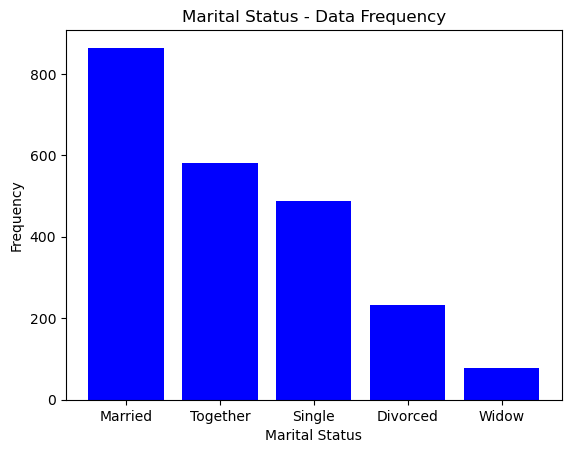

Número de clientes según su estado civil: 
Married     864
Together    580
Single      487
Divorced    232
Widow        77
Name: MaritalStatus, dtype: int64


In [ ]:
# Número de clientes según su estado civil 'MaritalStatus'
plt.figure()
plt.bar(data["MaritalStatus"].value_counts().index, data["MaritalStatus"].value_counts(), color = "b")
plt.xlabel("Marital Status")
plt.ylabel("Frequency")
plt.title("Marital Status - Data Frequency")
plt.show()
print(f"Número de clientes según su estado civil: \n{data['MaritalStatus'].value_counts()}")

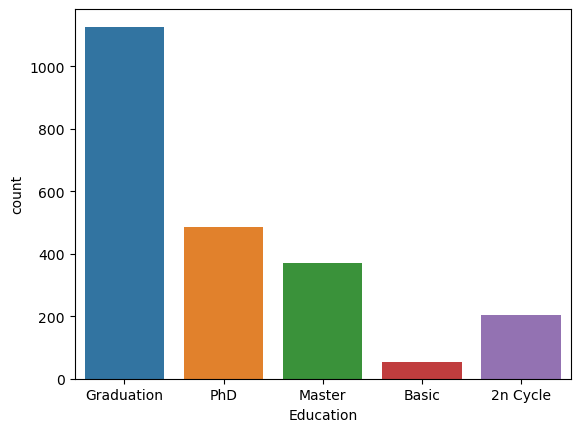

Número de clientes según su nivel educativo: 
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64


In [ ]:
# Número de clientes clasificados por su nivel educativo 'Education'
sns.countplot(x="Education", data=data)
plt.xticks(rotation = 0)
plt.show()
print(f"Número de clientes según su nivel educativo: \n{data['Education'].value_counts()}")

In [ ]:
# pivot table for see maritalstatus according to education
df = data[["Education", 'MaritalStatus']].value_counts().groupby(["Education", "MaritalStatus"]).sum().reset_index().sort_values(by=['Education','MaritalStatus'], ascending=False)
df = (df.pivot(index='Education', columns='MaritalStatus', values=0))
df

MaritalStatus,Divorced,Married,Single,Together,Widow
Education,,,,,
2n Cycle,23,81,37,57,5
Basic,1,20,18,14,1
Graduation,119,433,254,286,35
Master,37,138,77,106,12
PhD,52,192,101,117,24


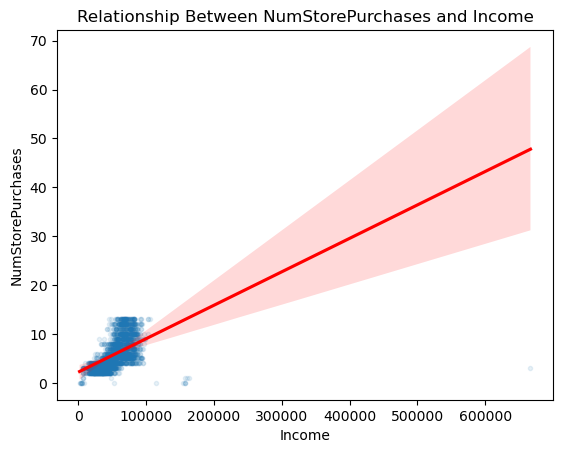

In [ ]:
sns.regplot(x='Income', y='NumStorePurchases', data=data, marker=".", scatter_kws={'alpha':0.1}, line_kws={'color':"red"})
plt.title('Relationship Between NumStorePurchases and Income')
plt.show()

Conclusión: Se confirma que los clientes con mayor ingresos y por tanto poder adquisitivo, son los que más gastan en sus compras.

Conclusión: El nivel de gasto en tienda es proporcional al nivel de ingresos del cliente.

### Analisis de los productos comprados

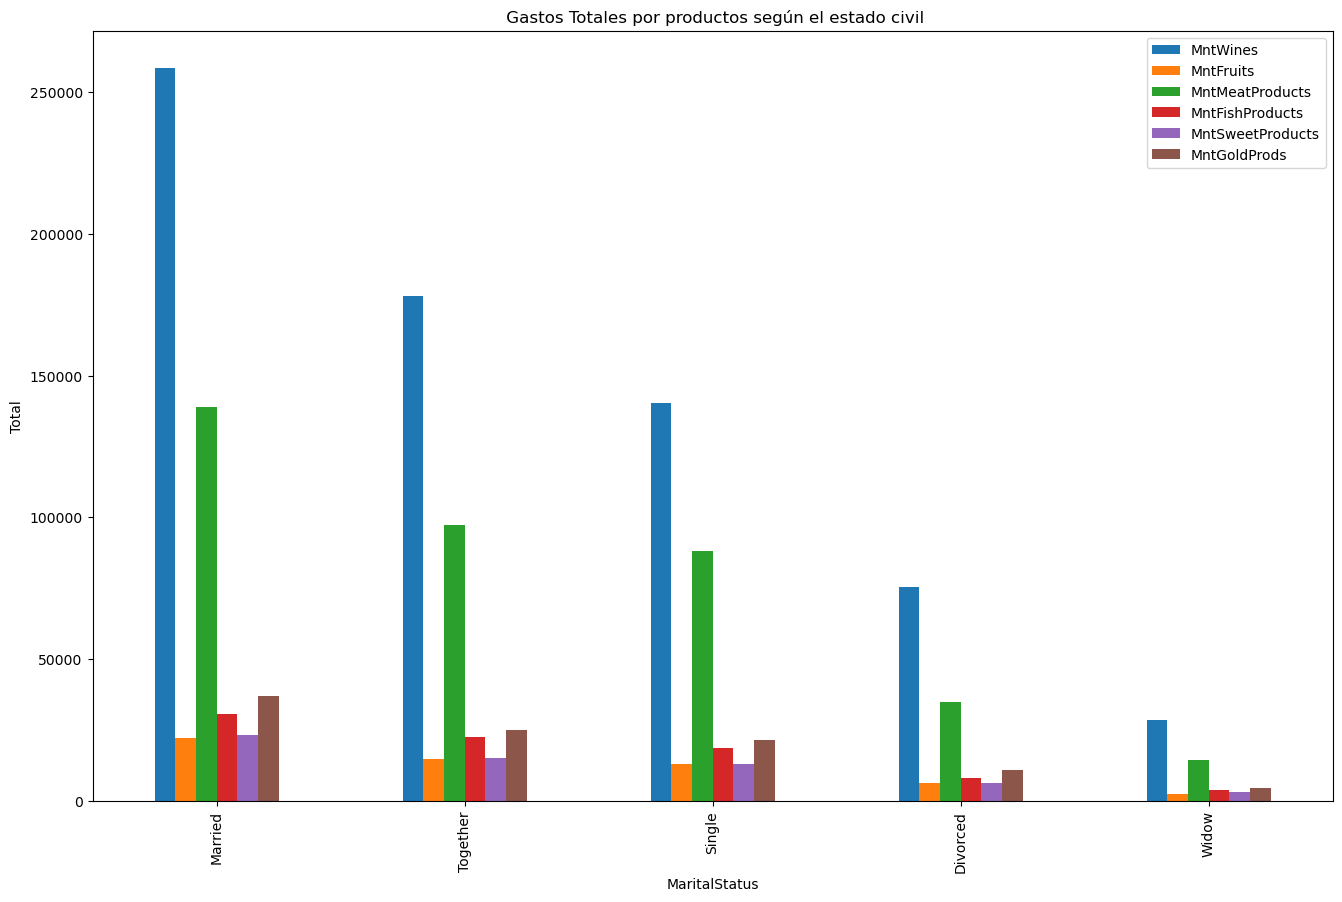

In [ ]:
# Total de compras y productos según el estado civil.
df = data[["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds", 'MaritalStatus']].groupby(["MaritalStatus"]).sum().reset_index().sort_values(by=["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"], ascending=False)
df.plot(x="MaritalStatus", ylabel= "Total", kind="bar", figsize=(16, 10), legend=True, title=" Gastos Totales por productos según el estado civil")
plt.show()

Conclusión: Los clientes casados hace un mayor porcentaje de compras, seguidos por las personas que viven en pareja.
El producto que más nos compran en todos los casos es vinos (licores), seguidos por los productos cárnicos. 

### Analisis del volumen de compras según la edad

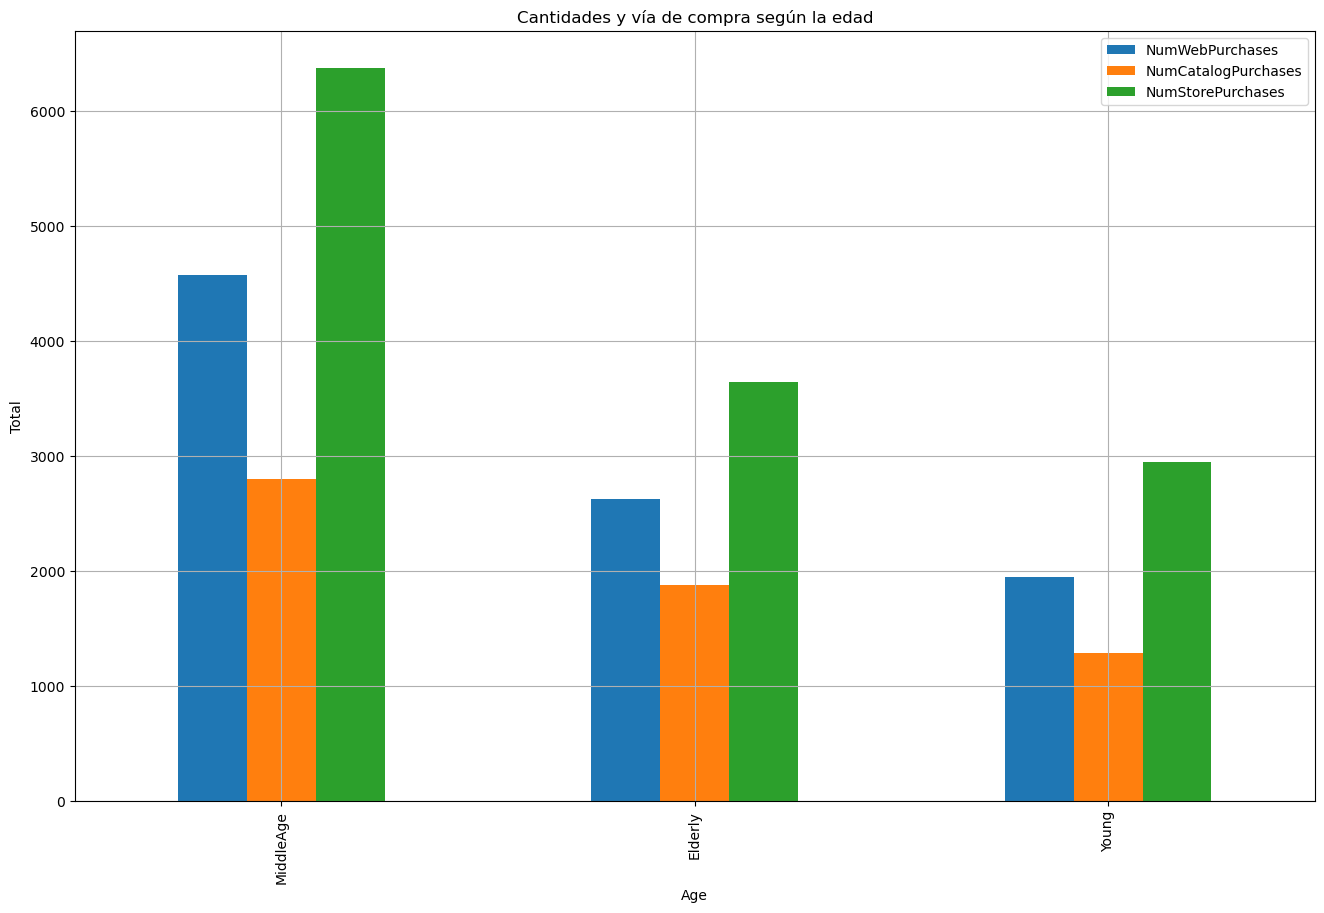

In [ ]:
# Cantidades y vía de compra según la edad
df = data[["Age", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]].groupby(["Age"]).sum().reset_index().sort_values(by=["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"], ascending=False)
df.plot(x="Age", ylabel= "Total", kind="bar", figsize=(16, 10), legend=True, grid=True, 
        title="Cantidades y vía de compra según la edad")
plt.show()

Conclusión: El mayor volumen de compra lo realizan quienes están en la mediana edad. Siendo los más jóvenes los que menos compran. En todos los casos, la vía de compra mayor es en la tienda, seguido en la página web y en últimos lugar vía catálogo.

Muestra proporcionalmente las distintas vías de compra según la edad

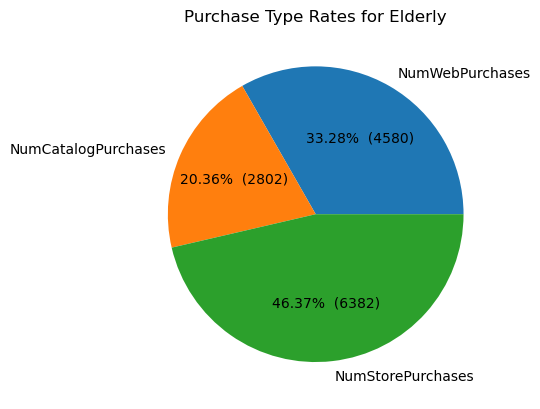

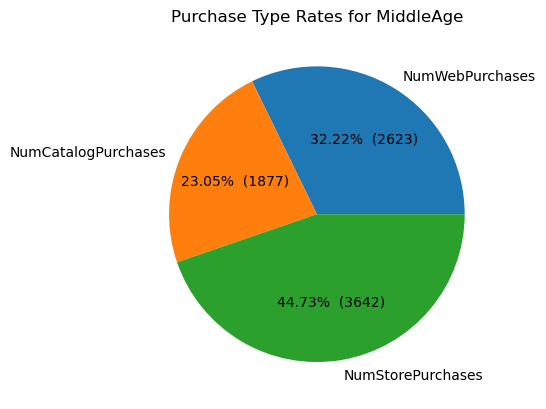

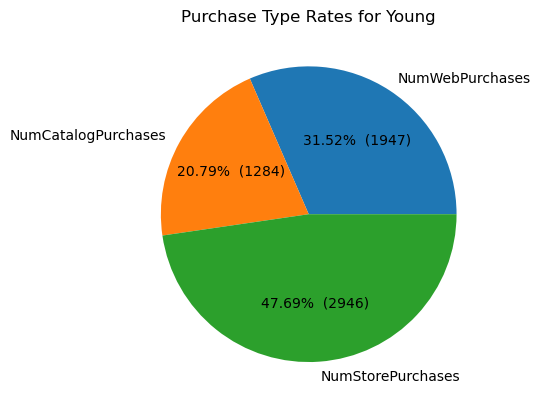

In [ ]:
# Purchase Type Rates according to Age
# set target row index
target_row_index = [0, 1, 2]

# make the pie circular by setting the aspect ratio to 1
plt.figure(figsize=plt.figaspect(1))

# specify data for chart
values = df.iloc[target_row_index, 1:]
labels = df.columns[1:]

# define function to format values on chart
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'{pct:.2f}%  ({val:d})'
    return my_autopct

for i in target_row_index:
    values = df.iloc[i, 1:]
    labels = df.columns[1:]
    plt.title(f"Purchase Type Rates for {df.loc[i].Age}")
    plt.pie(values, labels=labels, autopct=make_autopct(values))
    plt.show()

Conclusión: Los porcentajes de compra son muy similares para las tres franjas de edad. Del 44-47% se compra en tienda física, del 31,5% al 33,3% de las compras se hacen online y del 20,36% al 23,05% de las compras se realizan por catálogo.

### Complain Analysis

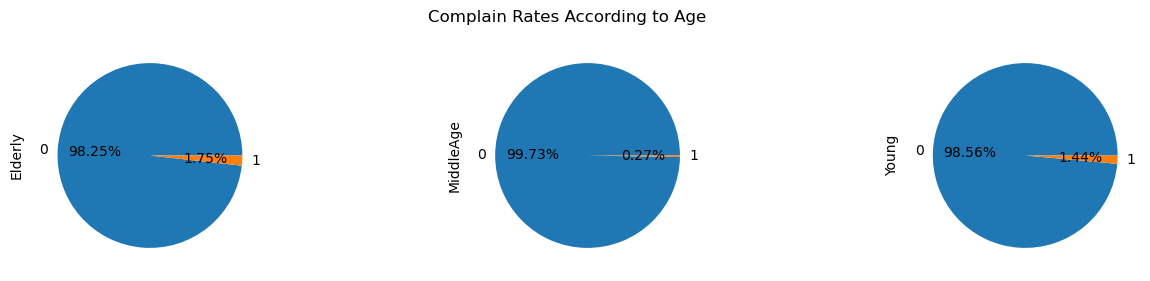

In [ ]:
# Ratios de quejas según la edad.
df = pd.crosstab(index= data["Complain"] , columns=data['Age'])
df.plot(x="Complain", kind="pie", figsize=(16, 3), legend=False, subplots=True, autopct='%1.2f%%',
        title="Complain Rates According to Age")
plt.show()

Conclusión: Las personas mayores son las que más quejas presentan, seguidos por los más jóvenes

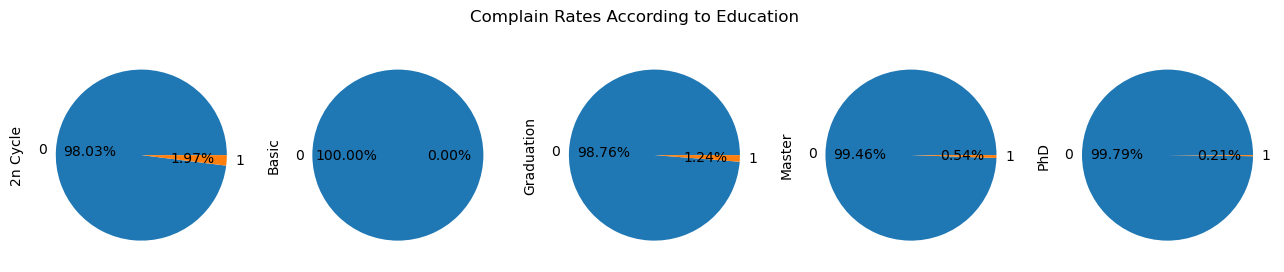

In [ ]:
# Ratios de quejas según el nivel educativo.
df = pd.crosstab(index= data["Complain"] , columns=data['Education'])
df.plot(x="Complain", kind="pie", figsize=(16, 3), legend=False, subplots=True, autopct='%1.2f%%',
        title="Complain Rates According to Education")
plt.show()

Conclusión: Las personas con formación de segundo ciclo junto con los graduados son los que presentan mayor número de quejas. Mientras que los que tienen estudios básicos y los doctorados casi nunca presentan quejas. 

### Análisis de respuesta a las campañas

In [ ]:
# Nivel de respuesta a la campaña según el nivel educacional 
# (1.- adquiere la campaña, 0.- No hay respuesta a la campaña)
pd.crosstab(index= data['Education'] , columns=data['Response'])

Response,0,1
Education,,
2n Cycle,181,22
Basic,52,2
Graduation,975,152
Master,313,57
PhD,385,101


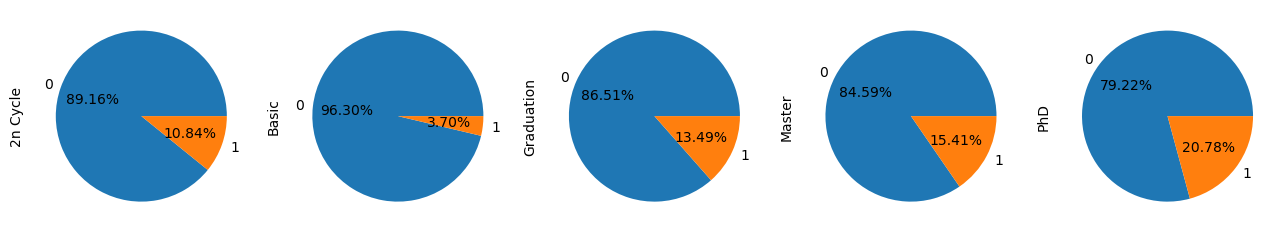

In [ ]:
# Ratio de respuesta a las campañas según el nivel educativo.
pd.crosstab(index=data['Response'], columns=data['Education']).plot(kind="pie", figsize=(16, 8), subplots=True, autopct='%1.2f%%', legend=False)
plt.show()

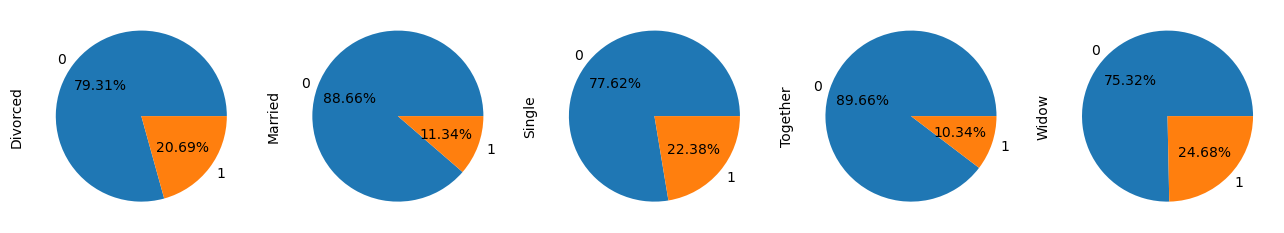

In [ ]:
# Ratio de respuesta a las campañas según el nivel estado civil.
pd.crosstab(index=data['Response'], columns=data["MaritalStatus"]).plot(kind="pie", figsize=(16, 8), subplots=True, autopct='%1.2f%%', legend=False)
plt.show()

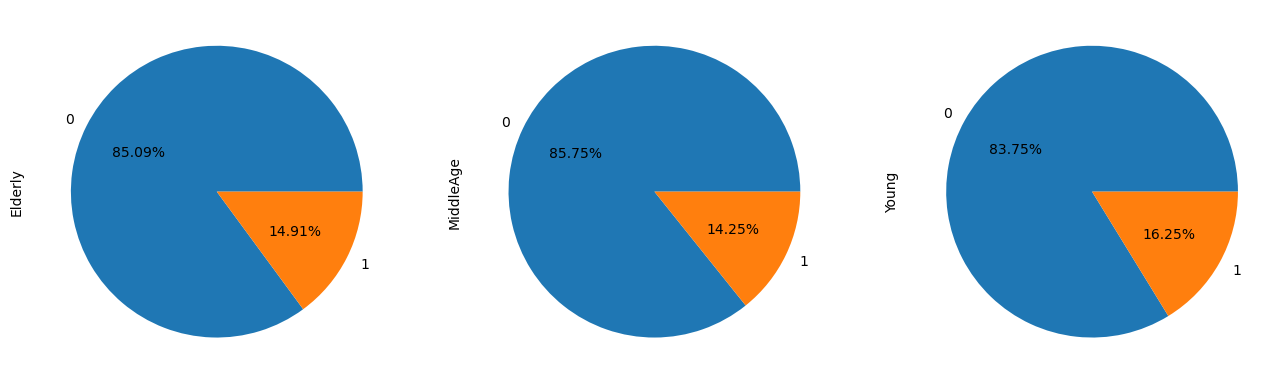

In [ ]:
# Ratio de respuesta a las campañas según la edad.
pd.crosstab(index=data['Response'], columns=data["Age"]).plot(kind="pie", figsize=(16, 8), subplots=True, autopct='%1.2f%%', legend=False)
plt.show()

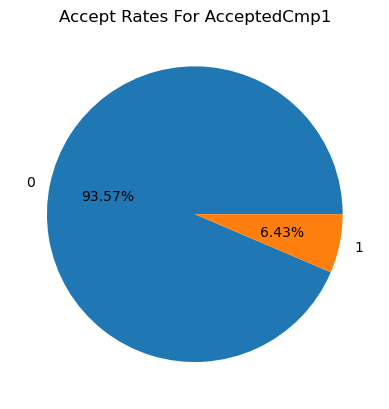

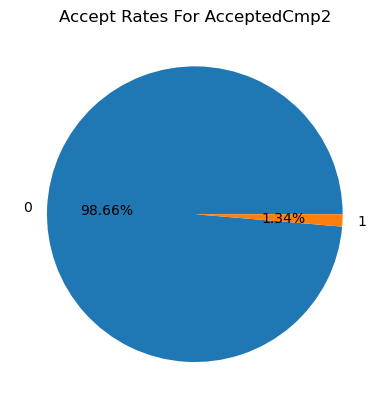

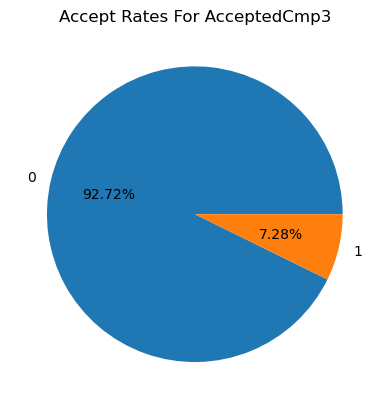

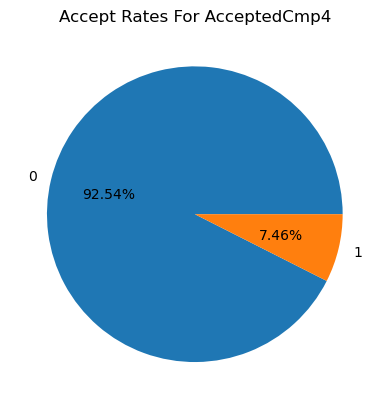

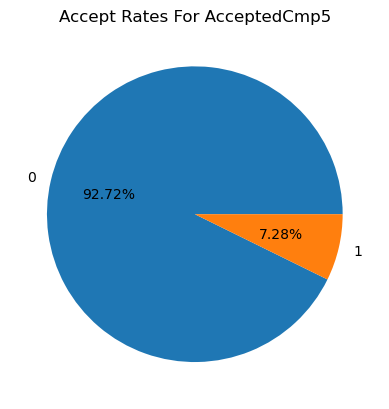

In [ ]:
# Ratios de aceptación en cada una de las campañas.
campaigns = ["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5",]
for i in campaigns:
    accept_rate = (data.groupby(i).size() / data[i].count()) * 100
    plt.title(f"Accept Rates For {i}")
    plt.pie(accept_rate, labels=data[i].unique(), autopct='%1.2f%%')
    plt.show() 

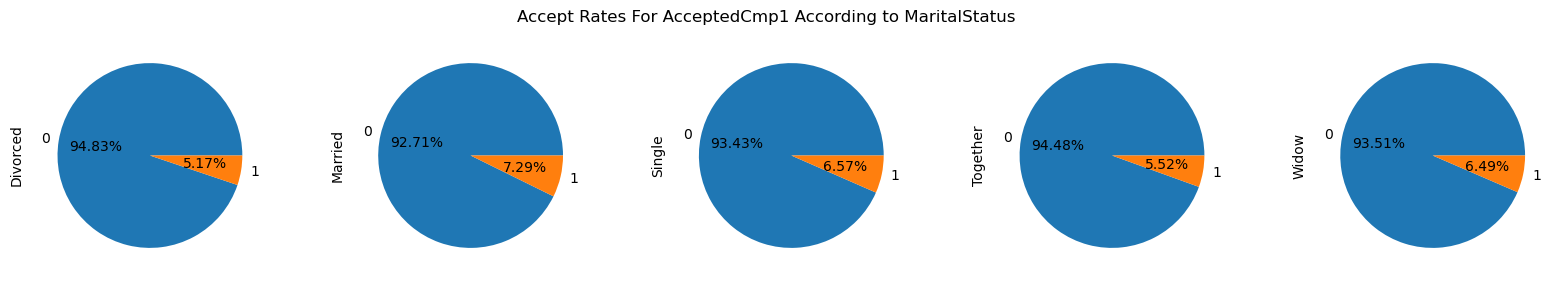

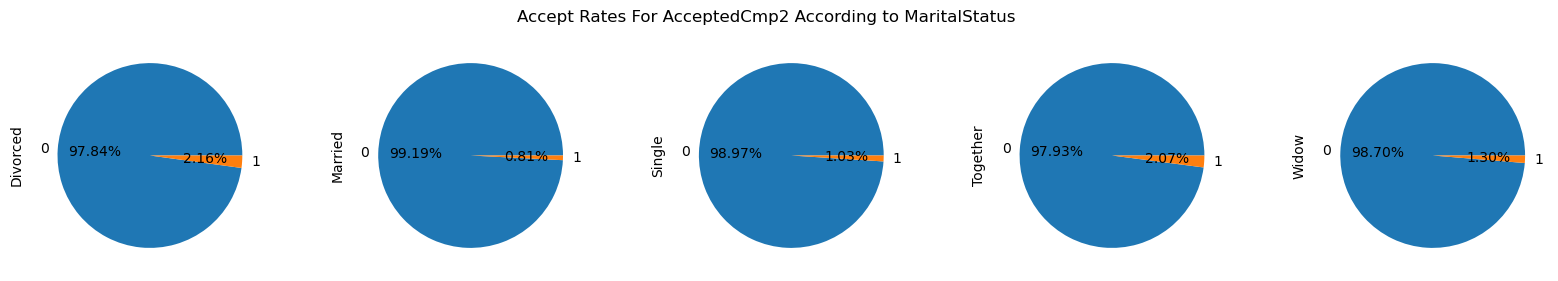

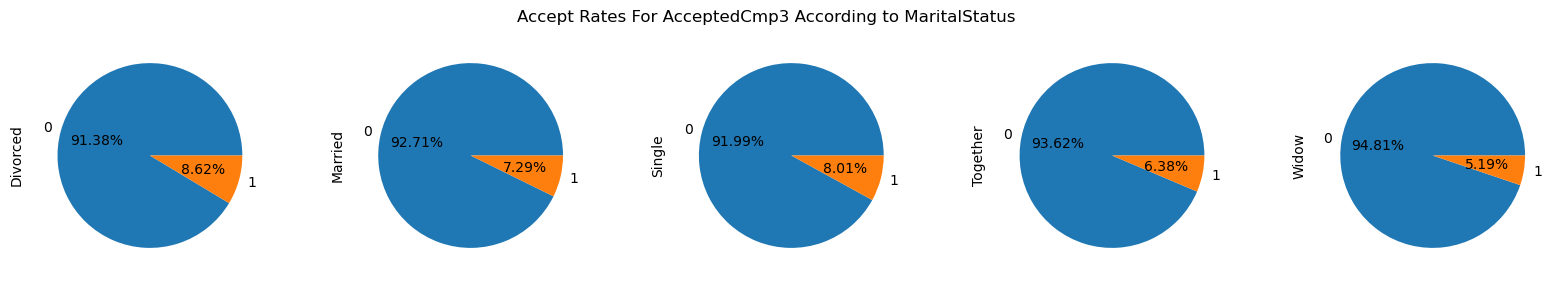

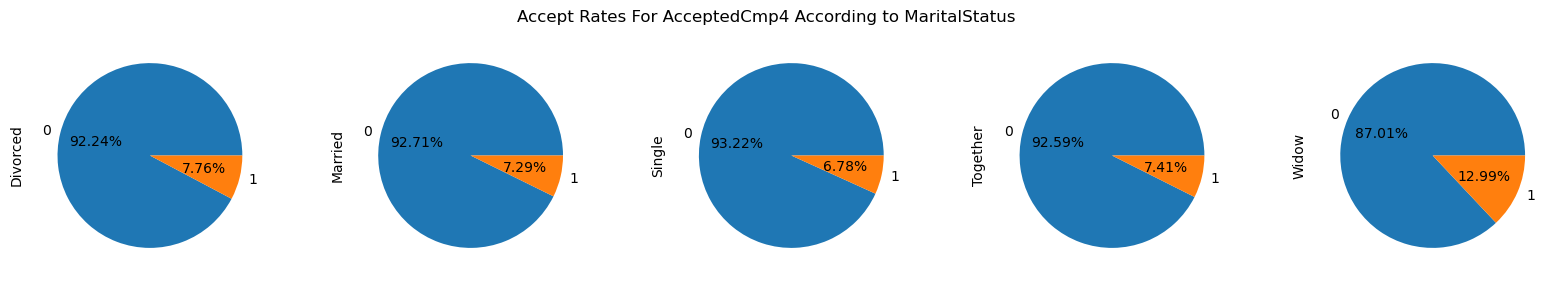

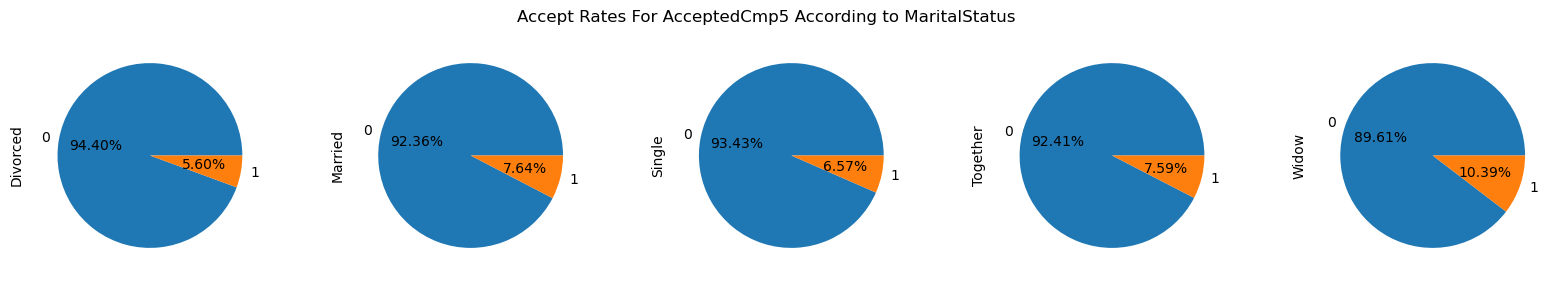

In [ ]:
for i in campaigns:
    pd.crosstab(index= data[i] , columns=data['MaritalStatus']).plot(kind="pie", figsize=(20, 3), subplots=True, autopct='%1.2f%%',
                                                                     legend=False, title=f"Accept Rates For {i} According to MaritalStatus")
    plt.show()

Conclusión: De las 5 campañas que se han realizado, cada una ha tenido diferentes respuestas en función de cada uno de los grupos. Es posible que cada campaña fuera orientada a cada uno de los diferentes estados civiles con productos que interesan mayoritariamente a los componentes de cada estado civil (Divorciados, casados, solteros, parejas de hecho y viudos )

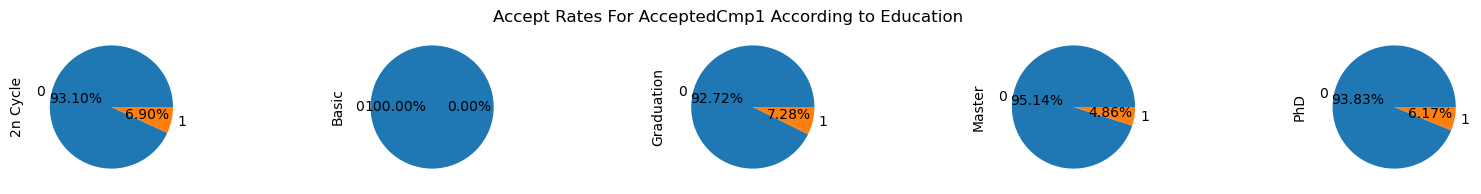

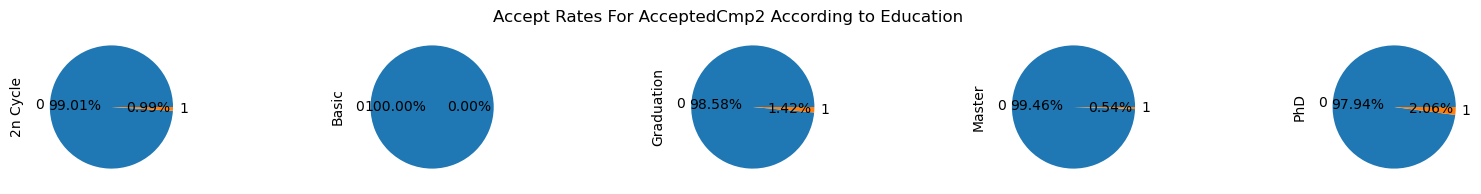

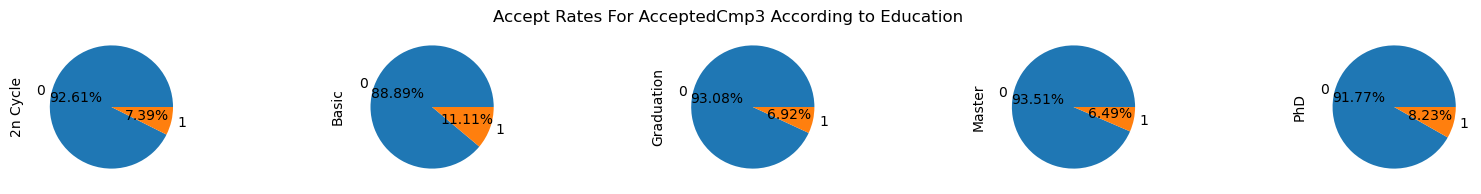

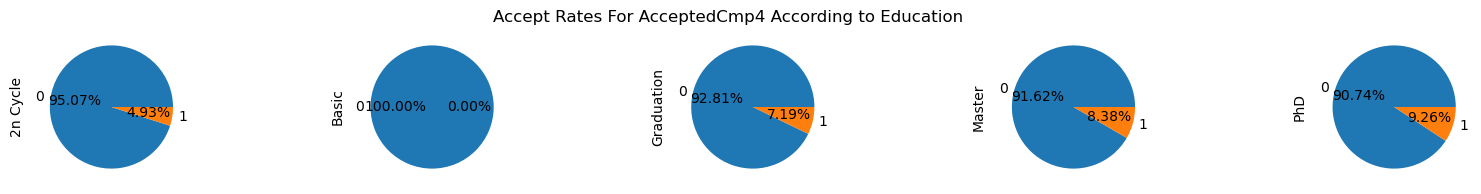

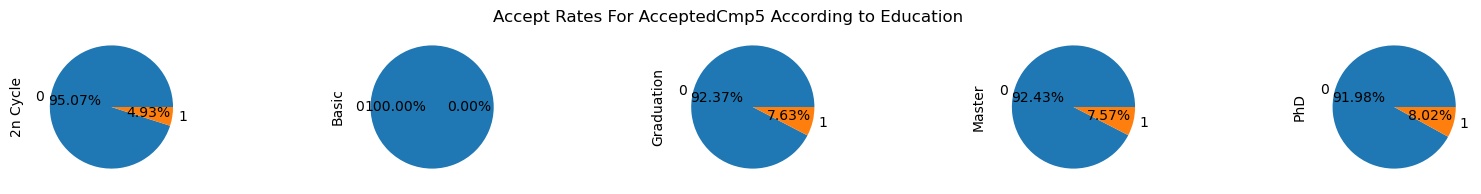

In [ ]:
for i in campaigns:
    pd.crosstab(index= data[i] , columns=data['Education']).plot(kind="pie", figsize=(20, 2), subplots=True, autopct='%1.2f%%',
                                                                 legend=False, title=f"Accept Rates For {i} According to Education")
    plt.show()

Conclusión: Los clientes con nivel de estudios de Graduado, Master y Doctorado 
(con mayores niveles de ingresos )son los que responden más favorablemente a 
las campañas que realiza la tienda. 
Mientras que los clientes de nivel de estudio Básico (y menor nivel de ingreso) 
no responden a las campañas en general, únicamente las que implican un gran descuento en las compras.

In [ ]:
df

Education,2n Cycle,Basic,Graduation,Master,PhD
Complain,,,,,
0,199,54,1113,368,485
1,4,0,14,2,1


### Recency Analysis

In [ ]:
df = data[['Income','Education']]
category_orders={"Education":["Basic","2n Cycle","Graduation","Master","PhD"]}
fig = px.histogram(df, x="Education",y="Income",  histfunc='avg',category_orders=category_orders)
fig.show()

Conclusió:

>- Average income is the highest for __PhD owners__ with __56145 dollars__  
>- Average income is the lowest for __Basic diploma owners__ with __20306 dollars__  
>- The better the diploma is, the higher the average salary  




In [ ]:
#We remove the only outlier in our dataset before handling missing values
dataset = dataset.drop(dataset[dataset['Income']> 600000].index).reset_index(drop=True)


In [ ]:
pd.options.display.float_format = "{:.2f}".format
dataset.describe()

,YearBirth,Income,KidHome,TeenHome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Year,Month
count,2239.00,2239.00,2239.00,2239.00,2239.00,2239.00,2239.00,2239.00,2239.00,2239.00,2239.00,2239.00,2239.00,2239.00,2239.00,2239.00,2239.00,2239.00,2239.00,2239.00,2239.00,2239.00,2239.00,2239.00,2239.00
mean,1968.80,51979.18,0.44,0.51,49.12,304.07,26.31,167.02,37.54,27.07,44.04,2.32,4.09,2.66,5.79,5.32,0.07,0.07,0.07,0.06,0.01,0.01,0.15,2013.03,6.47
std,11.99,21412.19,0.54,0.54,28.96,336.61,39.78,225.74,54.64,41.29,52.17,1.93,2.78,2.92,3.25,2.43,0.26,0.26,0.26,0.25,0.12,0.10,0.36,0.68,3.49
min,1893.00,1730.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2012.00,1.00
25%,1959.00,35533.50,0.00,0.00,24.00,24.00,1.00,16.00,3.00,1.00,9.00,1.00,2.00,0.00,3.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2013.00,3.00
50%,1970.00,51569.00,0.00,0.00,49.00,174.00,8.00,67.00,12.00,8.00,24.00,2.00,4.00,2.00,5.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2013.00,6.00
75%,1977.00,68277.50,1.00,1.00,74.00,504.50,33.00,232.00,50.00,33.00,56.00,3.00,6.00,4.00,8.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2013.00,10.00
max,1996.00,162397.00,2.00,2.00,99.00,1493.00,199.00,1725.00,259.00,263.00,362.00,15.00,27.00,28.00,13.00,20.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2014.00,12.00


In [ ]:
fig = px.histogram(dataset, x="Income",color="Education", nbins=10,histnorm='percent',barnorm='fraction',barmode='relative')
fig.show()

In [ ]:
data.head()

,YearBirth,Education,MaritalStatus,Income,KidHome,TeenHome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Year,Month,Age
0,1957,Graduation,Single,58138.00,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,2012,9,Elderly
1,1954,Graduation,Single,46344.00,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2014,3,Elderly
2,1965,Graduation,Together,71613.00,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,2013,8,MiddleAge
3,1984,Graduation,Together,26646.00,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,2014,2,Young
4,1981,PhD,Married,58293.00,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,2014,1,Young


In [ ]:
data.KidHome.unique()

array([0, 1, 2], dtype=int64)

In [ ]:
data.nunique()

YearBirth                59
Education                 5
MaritalStatus             5
Income                 1978
KidHome                   3
TeenHome                  3
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Response                  2
Year                      3
Month                    12
Age                       3
dtype: int64

# SEGMENTACIÓN:
Para realizar la Segmentación de los clientes, necesitamos determinar el número optimo de clusters (k). 

In [ ]:
transform = data.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
label =LabelEncoder()

category = ["Education", "MaritalStatus", "Age"]

for i in category:
    transform[i]= label.fit_transform(transform[i])


In [ ]:
data.columns

Index(['YearBirth', 'Education', 'MaritalStatus', 'Income', 'KidHome',
       'TeenHome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Year', 'Month', 'Age'],
      dtype='object')

In [ ]:

data_scaled =transform.copy()

numeric = ['YearBirth', 'Income', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

scaler = StandardScaler()
data_scaled[numeric] = scaler.fit_transform(transform [numeric])

In [ ]:
data_scaled

,YearBirth,Education,MaritalStatus,Income,KidHome,TeenHome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Year,Month,Age
0,-0.99,2,2,0.24,0,0,0.31,0.98,1.55,1.68,2.46,1.48,0.84,0.35,1.41,2.51,-0.55,0.69,0,0,0,0,0,0,1,2012,9,0
1,-1.24,2,2,-0.24,1,1,-0.38,-0.87,-0.64,-0.71,-0.65,-0.63,-0.73,-0.17,-1.11,-0.57,-1.17,-0.13,0,0,0,0,0,0,0,2014,3,0
2,-0.32,2,3,0.77,0,0,-0.80,0.36,0.57,-0.18,1.35,-0.15,-0.04,-0.69,1.41,-0.23,1.30,-0.54,0,0,0,0,0,0,0,2013,8,1
3,1.27,2,3,-1.02,1,0,-0.80,-0.87,-0.56,-0.65,-0.50,-0.58,-0.75,-0.17,-0.75,-0.91,-0.55,0.28,0,0,0,0,0,0,0,2014,2,2
4,1.02,4,1,0.24,1,0,1.55,-0.39,0.42,-0.22,0.16,-0.00,-0.56,1.38,0.33,0.12,0.06,-0.13,0,0,0,0,0,0,0,2014,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,-0.15,2,1,0.36,0,1,-0.11,1.20,0.42,0.07,0.08,2.20,3.89,-0.17,1.77,0.12,-0.55,-0.13,0,0,0,0,0,0,0,2013,6,1
2236,-1.90,4,3,0.47,2,1,0.24,0.30,-0.66,-0.61,-0.69,-0.66,-0.69,2.42,1.41,-0.23,-0.24,0.69,0,0,0,1,0,0,0,2014,6,0
2237,1.02,2,0,0.19,0,0,1.45,1.80,0.55,0.22,-0.10,-0.36,-0.38,-0.69,-0.75,0.12,2.22,0.28,0,1,0,0,0,0,0,2014,1,2
2238,-1.07,3,3,0.68,0,1,-1.42,0.37,0.09,0.21,0.78,0.07,0.33,-0.17,0.69,0.80,1.30,-0.95,0,0,0,0,0,0,0,2014,1,0


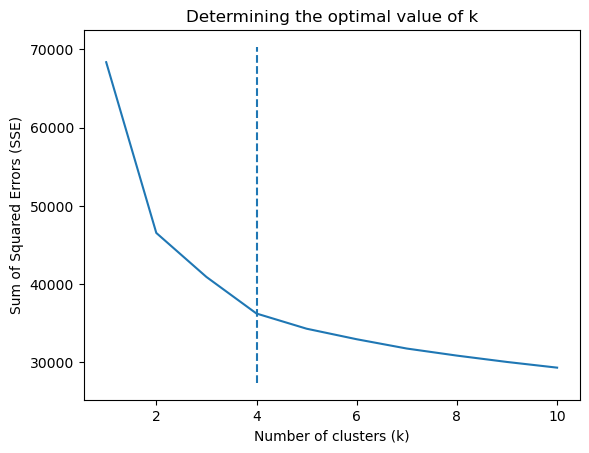

Optimal number of clusters (k): 4


In [ ]:
# determining the optimal value of K
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)
    
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
optimal_k = kl.elbow

# result visualization
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Determining the optimal value of k')
plt.plot(range(1, 11), sse)
plt.vlines(optimal_k, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()

print("Optimal number of clusters (k):", optimal_k)

Conclusión: El cluster optimo nos indica k=4 grupos, pero comprobamos que hay una mejor diferenciación o segmentación entre los grupo si lo hacemos con k=3. Así, que usaremos este último valor.

In [ ]:
# client clustering with K-means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)
data['Cluster'] = kmeans.labels_

In [ ]:
# Analyze the resulting groups/clusters
cluster_sizes = data['Cluster'].value_counts()

In [ ]:
# Mostrar cuantos clientes hay en cada groupo/cluster
for cluster in range(3):
    print(f"Group {cluster} contains {cluster_sizes[cluster]} clients")

Group 0 contains 476 clients
Group 1 contains 749 clients
Group 2 contains 1015 clients


In [ ]:
cluster_means = data.groupby('Cluster').mean()
cluster_means

,YearBirth,Income,KidHome,TeenHome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Year,Month
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,
0,1967.25,74215.32,0.09,0.39,50.04,578.72,58.96,372.68,83.51,58.55,78.29,1.97,5.61,5.46,8.56,3.31,0.07,0.13,0.21,0.16,0.03,0.01,0.21,2013.38,3.62
1,1969.54,39575.51,0.70,0.57,48.48,92.96,5.40,31.57,7.76,5.48,18.80,2.32,2.77,0.80,3.75,6.20,0.07,0.04,0.00,0.01,0.00,0.01,0.07,2013.50,3.74
2,1968.99,51309.85,0.42,0.52,49.13,330.75,26.41,170.37,37.92,28.22,46.56,2.49,4.34,2.73,6.00,5.61,0.08,0.08,0.06,0.06,0.01,0.01,0.18,2012.52,9.82


<AxesSubplot:xlabel='Cluster', ylabel='Income'>

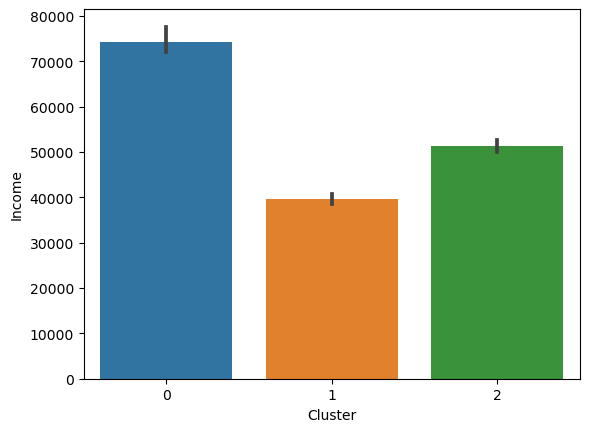

In [ ]:
sns.barplot(data=data, x="Cluster", y="Income")


¿A qué concluesiones llegamos? <br>



```Grupo 0``` Es el menos numeroso de los tres grupos (476 clientes), pero el que tiene la mayor tasa de ingresos (la media de 74.215$ anuales):
Por término medio, este grupo no tiene hijos.
En general, compran el mayor número de productos de todas las categorías: vino, frutas, carne, pescado, dulces y oro.
Aceptan activamente propuestas de campañas.
Suelen preferir comprar por catálogo y directamente en la tienda.

```Grupo 1```Es el segundo grupo más numeroso de los demás grupos (749 clientes):
De media, este grupo tiene un hijo;
Tiene los menores ingresos anuales que el resto de los grupos (39.575$)
Compra menos en cada categoría de productos.
Casi no aceptan ofertas.
visitan más a menudo la página web
Suelen comprar productos con descuento y por Internet.

```Grupo 2``` - Es el más numeroso que el resto de grupos (1015 clientes):
los ingresos medios anuales de este grupo son de 51.309$ anuales.
Este grupo suele tener un adolescente en la familia.
Tienen un poder adquisitivo medio - suelen comprar 2 veces menos por cada categoría en relación con el Grupo 0. 
Pefieren comprar con descuento, directamente en la tienda y por Internet.
Similar al Grupo 1 suelen beneficiarse de las propuestas de las campañas.
